In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread('../../KDT 자료/Ryan.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

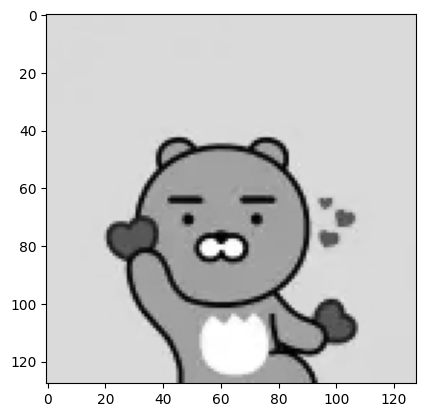

In [9]:
plt.imshow(img, cmap='gray')

In [7]:
# image resizing (사이즈 줄이기)
def Nearest_neighbor(image, scale = 2):
    height, width = image.shape
    re_height = int(scale * height)
    re_width = int(scale * width)
    res = np.zeros((re_height, re_width), dtype='uint8')
    for i in range(re_height):
        for j in range(re_width):
            pi = int(np.floor(i / scale))
            pj = int(np.floor(j / scale))
            res[i,j] = img[pi,pj]
    return res.astype('uint8')

In [17]:
# image resizing (사이즈 줄이기)
def bilinear_interpolation(image, scale = 2):
    height, width = image.shape
    re_height = int(scale * height)
    re_width = int(scale * width)
    res = np.zeros((re_height, re_width), dtype='uint8')
    for i in range(int(re_height-scale)):
        for j in range(int(re_width-scale)):
            pi = int(i / scale)
            pj = int(j / scale)
            x = (i / scale) - pi
            y = (j / scale) - pj
            res[i,j] = ((1-x)*(1-y)*image[pi,pj] + (1-x)*y*image[pi,pj+1] 
                        + x*(1-y)*image[pi+1,pj] + x*y*image[pi+1, pj+1])
    return res.astype('uint8')

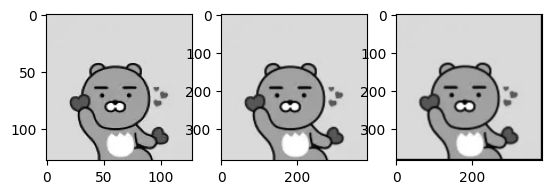

In [18]:
nn = Nearest_neighbor(img,3)
di = bilinear_interpolation(img,3)
f, ax = plt.subplots(1,3)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(nn, cmap='gray')
ax[2].imshow(di, cmap='gray')

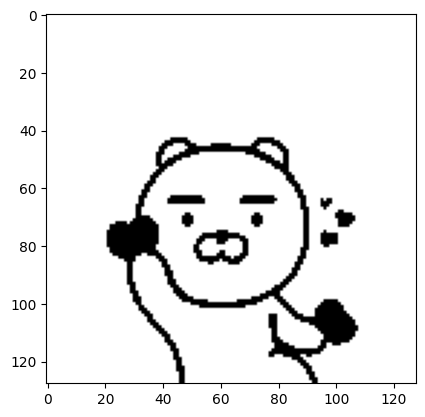

In [463]:
height, width = img.shape
bi_img = np.zeros_like(img, dtype='bool')
bi_img = img > 127
plt.imshow(bi_img, cmap='gray')

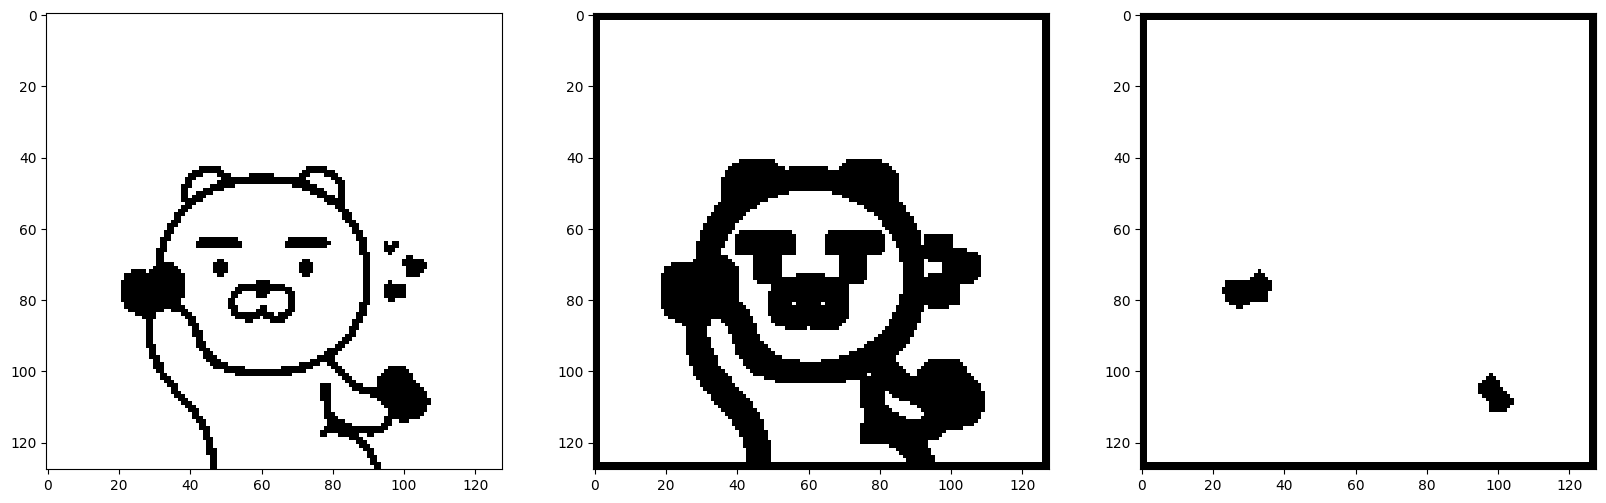

In [465]:
height, width = img.shape
res_e = np.zeros_like(bi_img, dtype='bool')
res_d = np.zeros_like(bi_img, dtype='bool')
for i in range(2, height-2):
    for j in range(2, width-2):
        res_e[i,j] = np.min(bi_img[i-2:i+3,j-2:j+3])
        res_d[i,j] = np.max(bi_img[i-2:i+3,j-2:j+3])
        
f, ax = plt.subplots(1, 3)
f.set_size_inches(20,20)
ax[0].imshow(bi_img, cmap='gray')
ax[1].imshow(res_e, cmap='gray')
ax[2].imshow(res_d, cmap='gray')

In [466]:
def erosion(src, radius=1):
    res = np.zeros_like(src, dtype=bool)
    for i in range(radius, len(src)-radius):
        for j in range(radius, len(src[i])-radius):
            patch = src[i-radius:i+radius+1, j-radius:j+radius+1]
            check = np.sum(patch == 0)
            if(not check): res[i,j] = 1
    return res

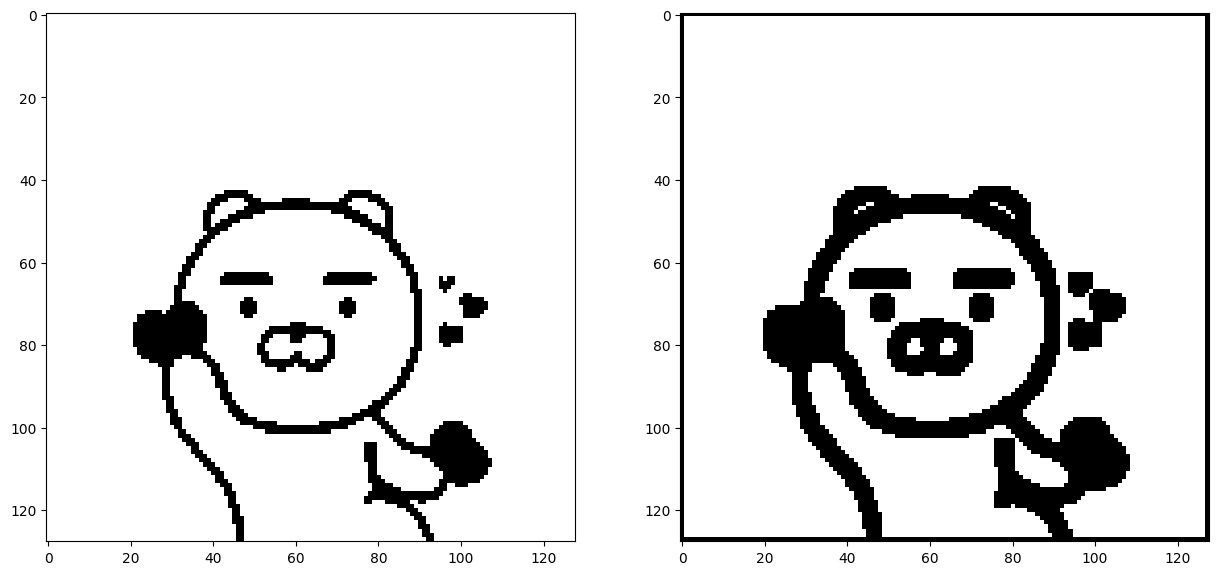

In [467]:
erosion_img = erosion(bi_img, 1)
f, ax = plt.subplots(1,2)
f.set_size_inches(15,15)
ax[0].imshow(bi_img, cmap='gray')
ax[1].imshow(erosion_img, cmap='gray')

In [468]:
def dilation(src, radius=1):
    res = np.zeros_like(src, dtype=bool)
    for i in range(radius, len(src)-radius):
        for j in range(radius, len(src[i])-radius):
            
            patch = src[i-radius:i+radius+1, j-radius:j+radius+1]
            check = np.sum(patch == 1)
            if(check): res[i,j] = 1
    return res

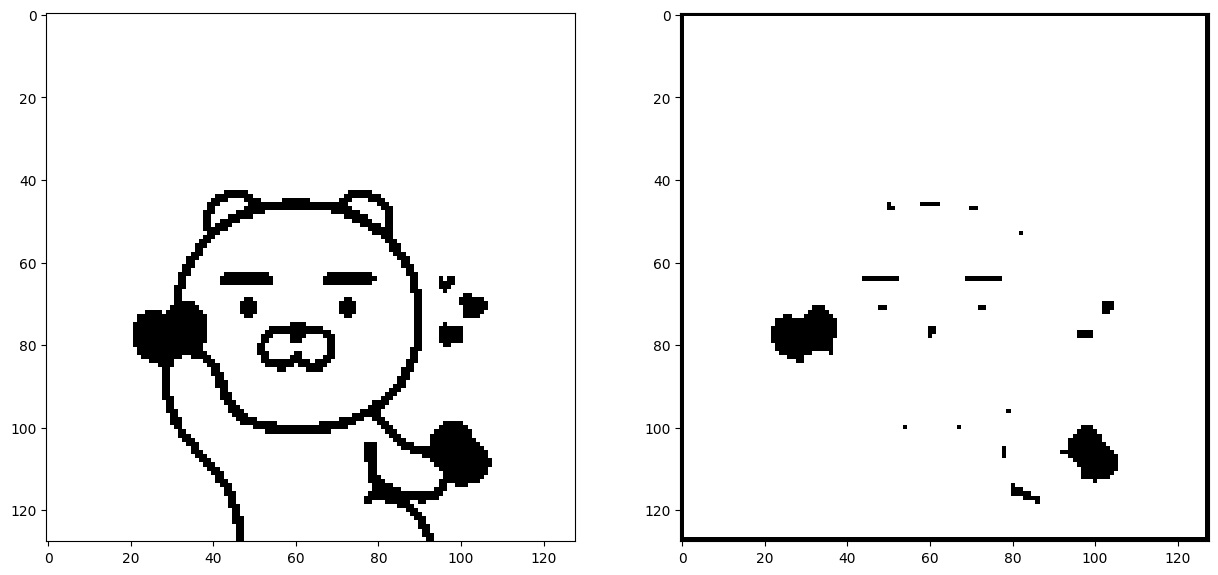

In [469]:
dilation_img = dilation(bi_img, 1)
f, ax = plt.subplots(1,2)
f.set_size_inches(15,15)
ax[0].imshow(bi_img, cmap='gray')
ax[1].imshow(dilation_img, cmap='gray')

In [470]:
def opening(src, radius=1):
    return dilation(erosion(src, radius))

In [471]:
def closing(src, radius=1):
    return erosion(dilation(src, radius))

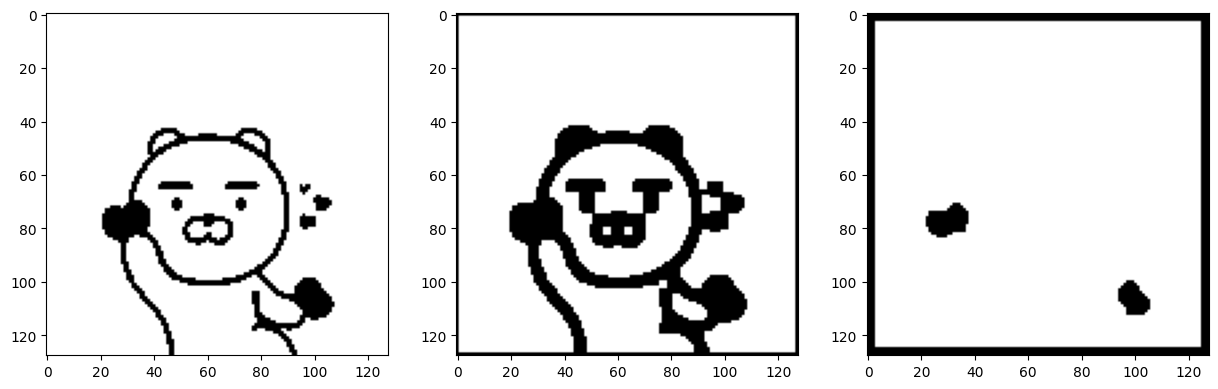

In [472]:
opening_img = opening(bi_img, 2)
closing_img = closing(bi_img, 2)
f, ax = plt.subplots(1,3)
f.set_size_inches(15,15)
ax[0].imshow(bi_img, cmap='gray')
ax[1].imshow(opening_img, cmap='gray')
ax[2].imshow(closing_img, cmap='gray')

In [473]:
def zero_padding(src, padding=100):
    height, width = src.shape
    res = np.zeros((height+padding, width+padding), dtype='uint8')
    res[int(padding/2):height+int(padding/2), int(padding/2):width+int(padding/2)] = src
    return res

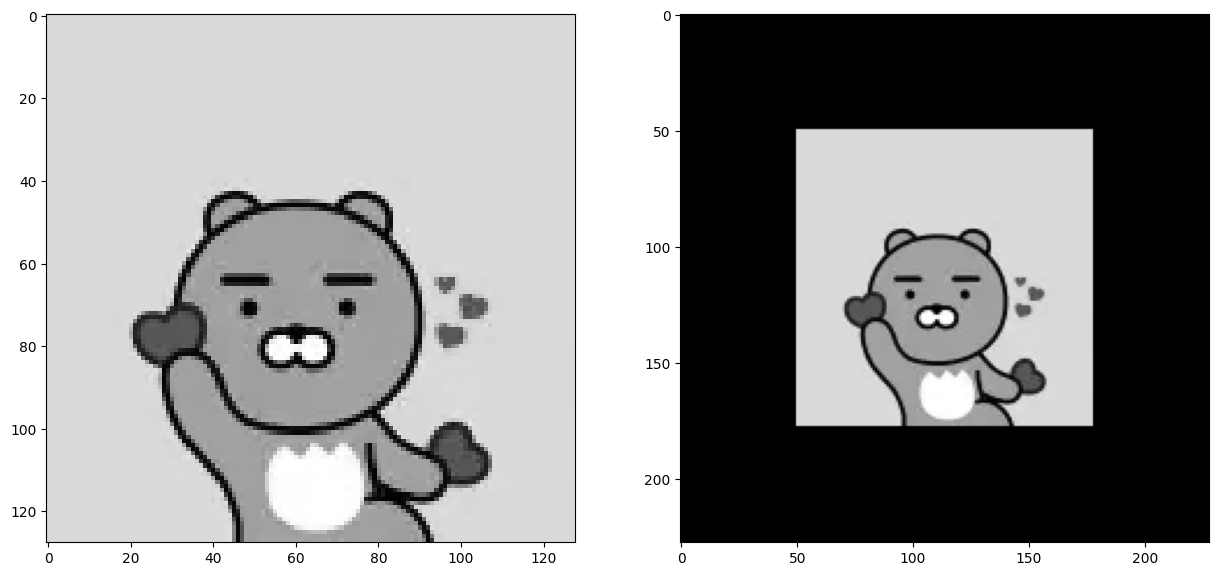

In [474]:
zero_p = zero_padding(img, 100)
f, ax = plt.subplots(1,2)
f.set_size_inches(15,15)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(zero_p, cmap='gray')

In [475]:
def avg_f(src, padding=2):
    height, width = src.shape
    kernel = np.array([[0,1,0],[1,0,1],[0,1,0]])
    res = np.zeros((height-padding, width-padding), dtype='uint8')
    for i in range(height-padding):
        for j in range(width-padding):
            res[i, j] = np.sum(kernel * 
                               src[i+int(padding/2)-1:i+int(padding/2)+2,
                                   j+int(padding/2)-1:j+int(padding/2)+2])/4   
    return res

(128, 128)


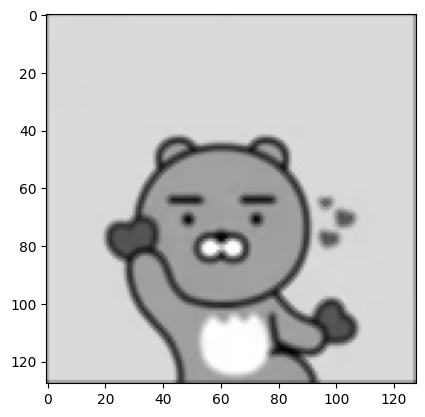

In [476]:
avg_z_p = avg_f(zero_p, 100)
print(avg_z_p.shape)
plt.imshow(avg_z_p, cmap='gray')

In [477]:
def mirror_padding(src, padding=2):
    height, width = src.shape
    res = np.zeros((height+padding, width+padding), dtype='uint8')
    
    for i in range(int(padding/2)):
        res[i, int(padding/2):width+int(padding/2)] = src[0]
        res[i+int(padding/2)+height, int(padding/2):width+int(padding/2)] = src[height-1]
            
    for i in range(height+padding):
        for j in range(int(padding/2)):
            res[i, j] = res[int(padding/2)-1, int(padding/2)]
            res[i, j+width+int(padding/2)] = res[int(padding/2)-1, int(padding/2)]
            
    for i in range(height):
        for j in range(width):
            res[i+int(padding/2),j+int(padding/2)] = src[i,j]
    return res

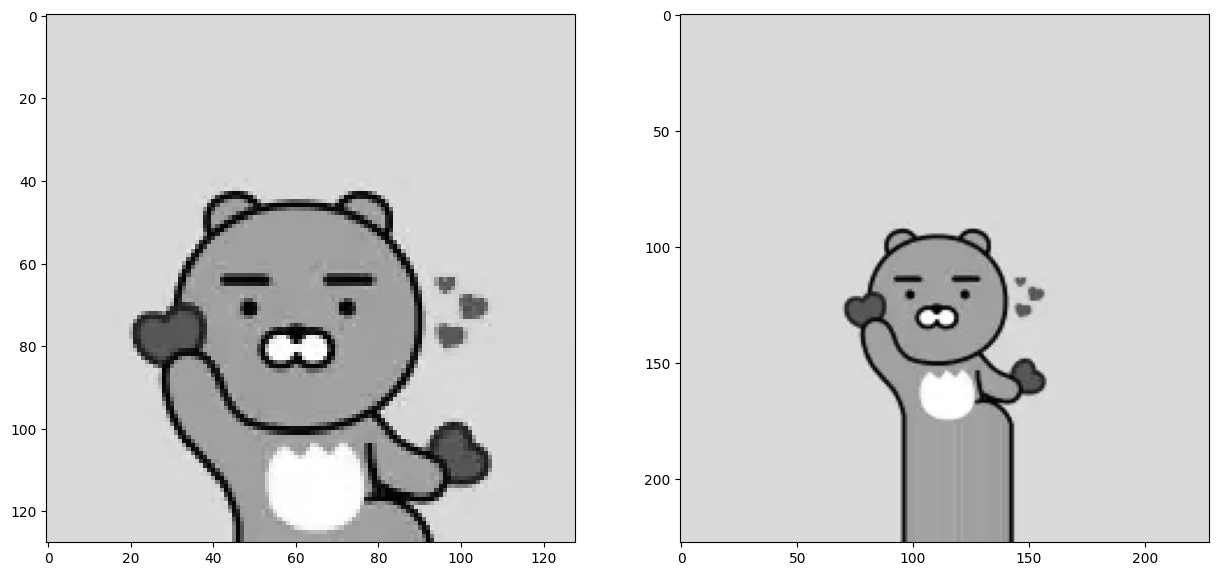

In [478]:
mirror_p = mirror_padding(img, 100)
f, ax = plt.subplots(1,2)
f.set_size_inches(15,15)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(mirror_p, cmap='gray')

(128, 128)


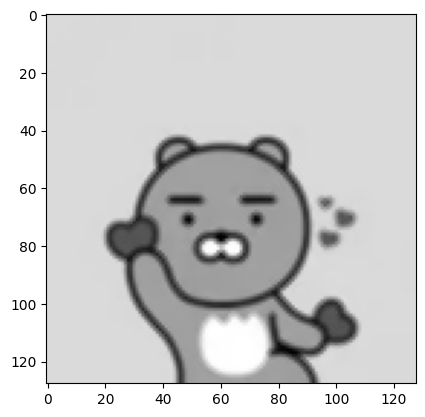

In [479]:
avg_m_p = avg_f(mirror_p, 100)
print(avg_m_p.shape)
plt.imshow(avg_m_p, cmap='gray')